<a href="https://colab.research.google.com/github/marco-milanesi/5bar-parallel-painting-robot/blob/main/1_IntentRecognition/Ex2_intent_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detection of multiple intents

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') # Run it if the drive hasn't already mounted

Mounted at /content/gdrive


## Import packages

In [3]:
import os
import pandas as pd
import numpy as np
import statistics 
import glob
from numpy import mean, absolute
from natsort import natsorted


path = "/content/gdrive/MyDrive/Colab Notebooks/Social Robot/1_IntentRecognition/Kismet_data_intent/"
os.chdir(path)
extension_energy='en' #file extension of Energy features

energy_files=[i for i in glob.glob(f'*.{extension_energy}')]
energy_files=natsorted(energy_files) # sort based on file number

extension_frequency='f0' #file extension of Frequency features
frequency_files=[i for i in glob.glob(f'*.{extension_frequency}')]
frequency_files=natsorted(frequency_files) # sort based on file number

file_list=[]
# Definition of the five classes of affective communicative intents strings
substring_approval="ap" 
substring_prohibition="pw"
substring_attention="at"
# list of the class (labels)
classification=[] 
  

## Load Data for frequency

In [4]:
mean_frequency=[]
maximum_frequency=[]
range_frequency=[]
variance_frequency = []
median_frequency = []
Firstquartile_frequency = []
Thirdquartile_frequency = []
AbsoluteMeanDeviation_frequency = []
file_index_list = []
index_list = []
index = -1
classification = [] # Reintialization of the classification list
file_list=[]
time = []
mean_absolute_local_derivative_frequency = []

for i in frequency_files:
  if substring_approval in i:
    classification.append("approval")
  elif substring_prohibition in i:
    classification.append("prohibition")
  elif substring_attention in i:
    classification.append("attention")
    
  with open(i) as f:
    for line in f:
      index = index + 1 # line number
      num=float(line.split(" ")[1]) # Extract the frequency part
      t=float(line.split(" ")[0]) # Extract the time part
      if num != 0:
        file_list.append(num)
        time.append(t)
        file_index_list.append(index)
    
  index_list.append(file_index_list) # Create the list of list indexes
  file_index_list = []
  index = -1
  mean_frequency.append(np.mean(file_list))
  maximum_frequency.append(max(file_list))
  range_frequency.append(max(file_list)-min(file_list))
  variance_frequency.append(statistics.variance(file_list))
  median_frequency.append(statistics.median(file_list))
  Firstquartile_frequency.append(np.quantile(file_list,q=0.25))
  Thirdquartile_frequency.append(np.quantile(file_list,q=0.75))
  AbsoluteMeanDeviation_frequency.append(mean(absolute(file_list - mean(file_list))))
  mean_absolute_local_derivative_frequency.append(np.mean(abs(np.diff(file_list)/np.diff(time))))
  file_list=[]
  time=[]

## Load Data for energy


In [5]:
from numpy.core.fromnumeric import size
mean_energy=[]
maximum_energy=[]
range_energy=[]
variance_energy = []
median_energy = []
Firstquartile_energy = []
Thirdquartile_energy = []
AbsoluteMeanDeviation_energy = []
mean_absolute_local_derivative_energy = []
file_index = -1
index = -1

for i in energy_files: 
  index = index + 1
  with open(i) as f:
    for line in f:
      file_index = file_index + 1 # line number
      if file_index in index_list[index]: # Unvoiced segments taken from Frequency data
        num=float(line.split(" ")[1]) # Extract the frequency part
        t=float(line.split(" ")[0]) # Extract the time part
        file_list.append(num)
        time.append(t)
  file_index = -1
  
  mean_energy.append(np.mean(file_list))
  maximum_energy.append(max(file_list))
  range_energy.append(max(file_list)-min(file_list))
  if size(file_list) > 1:
    variance_energy.append(statistics.variance(file_list))
  else:
    variance_energy.append(0)
  median_energy.append(statistics.median(file_list))
  Firstquartile_energy.append(np.quantile(file_list,q=0.25))
  Thirdquartile_energy.append(np.quantile(file_list,q=0.75))
  AbsoluteMeanDeviation_energy.append(mean(absolute(file_list - mean(file_list))))
  mean_absolute_local_derivative_energy.append(np.mean(abs(np.diff(file_list)/np.diff(time))))
  time=[]
  file_list=[]

# Create the dataset

In [6]:
df=pd.DataFrame()
# Labels
df=pd.DataFrame(classification,columns=['label'])
# Energy Features
df.insert(1,"mean energy",mean_energy,True)
df.insert(2,"maximum energy",maximum_energy,True)
df.insert(3,"range energy",range_energy,True)
df.insert(4,"variance energy",variance_energy,True)
df.insert(5,"median energy",median_energy,True)
df.insert(6,"First Quartile",Firstquartile_energy,True)
df.insert(7,"Third Quartile",Thirdquartile_energy,True)
df.insert(8,"Absolute Mean Deviation",AbsoluteMeanDeviation_energy,True)
df.insert(9,"Absolute Local Derivative",mean_absolute_local_derivative_energy,True)
# Frequency Features
df.insert(10,"mean frequency",mean_frequency,True)
df.insert(11,"maximum frequency",maximum_frequency,True)
df.insert(12,"range frequency",range_frequency,True)
df.insert(13,"variance frequency",variance_frequency,True)
df.insert(14,"median frequency",median_frequency,True)
df.insert(15,"First Quartile",Firstquartile_frequency,True)
df.insert(16,"Third Quartile",Thirdquartile_frequency,True)
df.insert(17,"Absolute Mean Deviation",AbsoluteMeanDeviation_frequency,True)
df.insert(18,"Absolute Local Derivative",mean_absolute_local_derivative_frequency,True)
# Print the dataset created
df

,label,mean energy,maximum energy,range energy,variance energy,median energy,First Quartile,Third Quartile,Absolute Mean Deviation,Absolute Local Derivative,mean frequency,maximum frequency,range frequency,variance frequency,median frequency,First Quartile,Third Quartile,Absolute Mean Deviation,Absolute Local Derivative
0,attention,68.800000,73.0,22.0,26.589474,71.0,67.75,72.00,3.480000,107.368421,353.950000,402.0,83.0,877.102632,333.0,331.75,379.25,27.140000,239.473684
1,attention,67.518519,76.0,19.0,28.259259,69.0,65.50,71.00,4.310014,183.653846,348.222222,430.0,197.0,4030.641026,369.0,298.50,398.00,54.370370,471.634615
2,attention,68.800000,73.0,22.0,26.589474,71.0,67.75,72.00,3.480000,107.368421,353.950000,402.0,83.0,877.102632,333.0,331.75,379.25,27.140000,239.473684
3,attention,67.518519,76.0,19.0,28.259259,69.0,65.50,71.00,4.310014,183.653846,348.222222,430.0,197.0,4030.641026,369.0,298.50,398.00,54.370370,471.634615
4,prohibition,65.914894,71.0,16.0,17.775208,66.0,63.50,70.00,3.459484,74.409938,200.276596,257.0,90.0,675.987049,191.0,182.50,213.00,21.076505,273.726708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,attention,70.481481,80.0,26.0,36.216632,70.5,67.00,75.75,4.814815,129.935678,358.333333,457.0,225.0,4541.056604,378.5,309.50,408.00,56.864198,755.377358
535,attention,75.305556,85.0,27.0,43.418254,77.0,72.75,80.00,5.049383,115.714286,375.944444,484.0,233.0,3755.253968,375.0,372.75,397.00,41.274691,550.000000
536,attention,75.914286,86.0,23.0,29.021849,76.0,73.00,79.50,4.269388,120.840336,375.600000,477.0,213.0,3390.364706,379.0,338.50,417.50,47.268571,663.949580
537,attention,76.621622,83.0,22.0,27.575075,78.0,75.00,81.00,4.004383,110.745614,384.054054,494.0,281.0,6267.552553,405.0,332.00,439.00,64.635500,955.720029


In [7]:
labels = df.values[:,0]
samples = df.values[:,1:]

## Train test and split

In [8]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter
print("Labels distribution:",Counter(labels))

# train-test split
trainSamples, testSamples, trainLabels, testLabels = sklearn.model_selection.train_test_split(samples, labels, random_state=10,stratify=labels,train_size=0.6)
print("Train labels distribution:", Counter(trainLabels))
print("Test labels distribution:",Counter(testLabels))

Labels distribution: Counter({'prohibition': 188, 'approval': 185, 'attention': 166})
Train labels distribution: Counter({'prohibition': 113, 'approval': 111, 'attention': 99})
Test labels distribution: Counter({'prohibition': 75, 'approval': 74, 'attention': 67})


# KN Neighbors

In [9]:
model_kn = KNeighborsClassifier() # Create the model
model_kn.fit(trainSamples, trainLabels) #train the model
from sklearn.metrics import  accuracy_score,cohen_kappa_score
modelResults_kn = model_kn.predict(testSamples)

## SVM

In [10]:
from sklearn import svm # Import Support Vector Machine Classifier
model_svm = svm.SVC() # Create the model
model_svm.fit(trainSamples, trainLabels) #train the model
modelResults_svm = model_svm.predict(testSamples)

# Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier() # Create the model
clf = clf.fit(trainSamples, trainLabels) #train the model
modelResults_clf = clf.predict(testSamples)

## Gradient Boosting Classifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier # Import Gradient Boosting Classifier
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(trainSamples, trainLabels)
modelResults_gbc = gb_clf2.predict(testSamples)

## Models Evaluation

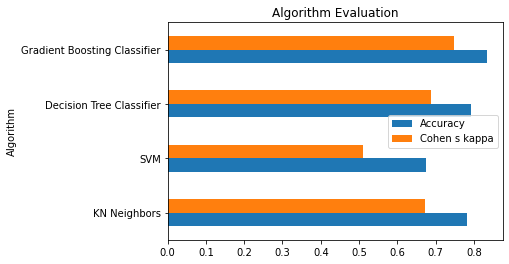

In [13]:
import matplotlib.pyplot as plt
   
data = {'Accuracy': [accuracy_score(testLabels, modelResults_kn) ,accuracy_score(testLabels, modelResults_svm) ,accuracy_score(testLabels, modelResults_clf) ,accuracy_score(testLabels, modelResults_gbc) ],
        'Cohen s kappa': [cohen_kappa_score(testLabels, modelResults_kn),cohen_kappa_score(testLabels, modelResults_svm),cohen_kappa_score(testLabels, modelResults_clf),cohen_kappa_score(testLabels, modelResults_gbc)]
       }
df = pd.DataFrame(data,columns=['Accuracy','Cohen s kappa'], index = ['KN Neighbors','SVM','Decision Tree Classifier','Gradient Boosting Classifier'])
df.plot.barh()
plt.title('Algorithm Evaluation')
plt.ylabel('Algorithm')
plt.show()

## Measures calculation of the best model

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(testLabels, modelResults_gbc)
print(classification_report(testLabels, modelResults_gbc))
accuracy = accuracy_score(testLabels, modelResults_gbc) 
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults_gbc)))

              precision    recall  f1-score   support

    approval       0.73      0.81      0.77        74
   attention       0.84      0.78      0.81        67
 prohibition       0.94      0.91      0.93        75

    accuracy                           0.83       216
   macro avg       0.84      0.83      0.83       216
weighted avg       0.84      0.83      0.83       216

Accuracy: 0.83
Cohen's Kappa: 0.75


## Print normalized confusion matrix

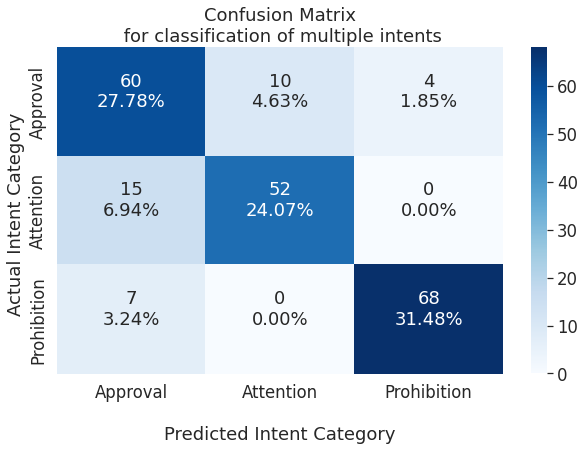

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.set(font_scale=1.5) # Adjust to fit
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',)

ax.set_title('Confusion Matrix\n for classification of multiple intents');
ax.set_xlabel('\nPredicted Intent Category')
ax.set_ylabel('Actual Intent Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Approval','Attention', 'Prohibition'])
ax.yaxis.set_ticklabels(['Approval','Attention', 'Prohibition'])

plt.rcParams["figure.figsize"] = (10,6)
## Display the visualization of the Confusion Matrix.
plt.show()